# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
# Write your code here
import re
from collections import Counter

# Load the dataset
with open("imdb_reviews.csv", "r", encoding="utf-8") as file:
    reviews = file.read().splitlines()

# Function to tokenize text
def tokenize(text):
    tokens = re.findall(r'\w+', text.lower())
    return tokens

# Function to count n-gram frequencies
def count_ngrams(tokens, n):
    ngrams = {}
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i+n])
        ngrams[ngram] = ngrams.get(ngram, 0) + 1
    return ngrams

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(tokens):
    unigrams = count_ngrams(tokens, 1)
    bigrams = count_ngrams(tokens, 2)
    bigram_probs = {}
    for bigram, count in bigrams.items():
        w1, w2 = bigram
        unigram_count = unigrams.get(w2, 0)
        if unigram_count > 0:
            bigram_probs[bigram] = count / unigram_count
    return bigram_probs

# Function to extract noun phrases and calculate relative probabilities
def extract_noun_phrases(reviews):
    noun_phrases = {}
    max_freq = 0
    for review in reviews:
        tokens = tokenize(review)
        trigrams = count_ngrams(tokens, 3)
        for ngram, freq in trigrams.items():
            if all(token[0].isupper() for token in ngram):
                noun_phrases[ngram] = noun_phrases.get(ngram, 0) + freq
                max_freq = max(max_freq, noun_phrases[ngram])

    relative_probs = {}
    for review in reviews:
        tokens = tokenize(review)
        trigrams = count_ngrams(tokens, 3)
        review_probs = {}
        for ngram, freq in trigrams.items():
            if ngram in noun_phrases:
                review_probs[ngram] = freq / max_freq
        relative_probs[review] = review_probs
    return noun_phrases, relative_probs

# Conduct N-gram analysis
all_tokens = []
for review in reviews:
    all_tokens.extend(tokenize(review))
# (1) Count the frequency of all the N-grams (N=3)
trigrams = count_ngrams(all_tokens, 3)
print("Trigram Frequencies:")
for trigram, freq in sorted(trigrams.items(), key=lambda x: x[1], reverse=True):
    print(f"{trigram}: {freq}")


    # (2) Calculate the probabilities for all the bigrams
all_tokens = []
for review in reviews:
    all_tokens.extend(tokenize(review))
bigram_probs = calculate_bigram_probabilities(all_tokens)
print("\nBigram Probabilities:")
for bigram, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True):
    #print(f"{bigram}: {prob:.5f}")
    print("Probabilities of bigrams" f"{bigram}: {prob:.5f}" )

# (3) Extract noun phrases and calculate relative probabilities
noun_phrases, relative_probs = extract_noun_phrases(reviews)
print("\nNoun Phrase Relative Probabilities:")
columns = sorted(noun_phrases.keys())
print("Review\t" + "\t".join(columns))
for review, probs in relative_probs.items():
    row = [review[:10] + "..."]
    for noun_phrase in columns:
        row.append(f"{probs.get(noun_phrase, 0):.5f}")
    print("\t".join(map(str, row)))






Streaming output truncated to the last 5000 lines.
('old', 'rival', 'but'): 49
('rival', 'but', 'the'): 49
('but', 'the', 'problem'): 49
('the', 'problem', 'with'): 49
('problem', 'with', 'this'): 49
('with', 'this', 'is'): 49
('this', 'is', 'there'): 49
('is', 'there', 'are'): 49
('there', 'are', 'already'): 49
('are', 'already', 'plenty'): 49
('already', 'plenty', 'of'): 49
('plenty', 'of', 'people'): 49
('of', 'people', 'that'): 49
('people', 'that', 'think'): 49
('that', 'think', 'like'): 49
('think', 'like', 'this'): 49
('like', 'this', 'we'): 49
('this', 'we', 'even'): 49
('we', 'even', 'saw'): 49
('even', 'saw', 'them'): 49
('saw', 'them', 'on'): 49
('them', 'on', 'screen'): 49
('on', 'screen', 'but'): 49
('screen', 'but', 'they'): 49
('but', 'they', 'are'): 49
('they', 'are', 'only'): 49
('are', 'only', 'shown'): 49
('only', 'shown', 'once'): 49
('shown', 'once', 'and'): 49
('once', 'and', 'never'): 49
('and', 'never', 'again'): 49
('never', 'again', 'the'): 49
('again', 'the',

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [11]:
import re
import csv
import math
from collections import Counter

# Read the dataset
with open('imdb_reviews.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    reviews = [row[0] for row in reader]

# Tokenize text into words
def tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().split()

# Calculate term frequency (TF)
def calculate_tf(document):
    term_counts = Counter(document)
    total_terms = sum(term_counts.values())
    tf = {term: count / total_terms for term, count in term_counts.items()}
    return tf

# Calculate inverse document frequency (IDF)
def calculate_idf(documents):
    term_docs = {}
    for document in documents:
        for term in set(document):
            term_docs[term] = term_docs.get(term, 0) + 1

    num_documents = len(documents)
    idf = {term: math.log(num_documents / doc_freq) for term, doc_freq in term_docs.items()}
    return idf

# Calculate TF-IDF matrix
def calculate_tfidf(documents):
    tf_idf_matrix = {}
    idf = calculate_idf(documents)

    for i, document in enumerate(documents):
        tf = calculate_tf(document)
        tf_idf_matrix[i] = {term: tf[term] * idf.get(term, 0) for term in tf}

    return tf_idf_matrix

# Calculate cosine similarity
def cosine_similarity(query, document_vector):
    query_vector = Counter(tokenize(query))
    numerator = sum(query_vector[term] * document_vector.get(term, 0) for term in query_vector)
    query_norm = math.sqrt(sum(value ** 2 for value in query_vector.values()))
    document_norm = math.sqrt(sum(value ** 2 for value in document_vector.values()))
    denominator = query_norm * document_norm

    if denominator == 0:
        return 0
    else:
        return numerator / denominator

# Preprocess documents
documents = [tokenize(review) for review in reviews]

# (1) Build the documents-terms weights (tf * idf) matrix
tf_idf_matrix = calculate_tfidf(documents)

# (2) Rank the documents with respect to query
query = "An Outstanding movie with a haunting performance and best character development"
ranked_documents = sorted([(document_id, cosine_similarity(query, document_vector)) for document_id, document_vector in tf_idf_matrix.items()], key=lambda x: x[1], reverse=True)

# Print the ranked documents
for i, (document_id, similarity) in enumerate(ranked_documents):
    print(f"{i+1}. Document {document_id+1} (Similarity: {similarity:.4f})")
    print(reviews[document_id])
    print()

1. Document 17 (Similarity: 0.0836)
Without question, this has the best CG works I have seen in recent movies.. Visuals are outstanding.. Underwater sequences and the fight scenes felt very real.. And that's all to it.. Just because it's a visual masterpiece, I cannot spend continuous 12-15 minutes just watching the underwater animals.. It felt like watching some episode from National Geographic or Animal planet..Overall, if you cut 30-40 mins of such parts, you will still not miss anything in the story line.. First half was mostly to setup the environment and was very lagging .. I was like ,"Okay.. I get it.. it's a great place with different creatures.. Now, please move on to the storyline..".. Climax fight portion was good but not as great as the Avatar 2009 climax fight.. After the fight we still get some 5-10 mins of lagging scenes.. "Come on ... Finish it already"...A major plot hole that I would think of is the reason for the presence of humans on Pandora.. What happened to the 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

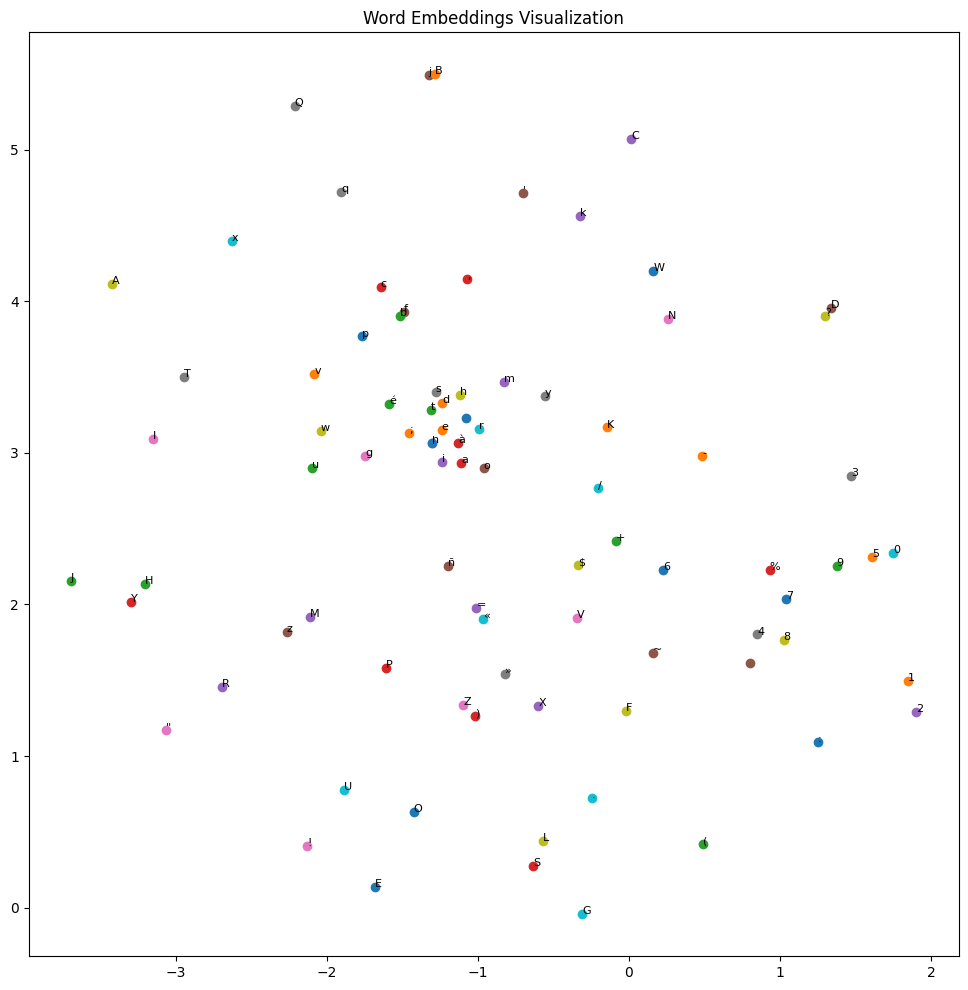

In [10]:
# Write your code here

import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Extract the text content of the reviews
documents = df['text'].tolist()

# Train the word2vec model
model = Word2Vec(sentences=documents, vector_size=300, window=5, min_count=5, workers=4)

# Visualize the word embeddings
vocab = list(model.wv.index_to_key)
embeddings = model.wv[vocab]

# Reduce the dimensionality of the embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(12, 12))
for i, word in enumerate(vocab):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)
plt.title('Word Embeddings Visualization')
plt.show()







## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [13]:
# The GitHub link of your final csv file


# Link:https://github.com/Rohithkumar7337/INFO_5731/blob/main/Annotated_imdb_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [12]:
# Type your answer

'''The assignment was quite comprehensive and challenging, as it required understanding and implementing various natural language processing concepts from scratch.
 Writing code for n-gram analysis, TF-IDF calculation, and document representation without the aid of pre-existing libraries was a substantial task.
However, it provided an excellent opportunity to deepen my understanding of these concepts and improve my programming skills.

One aspect I found particularly challenging was ensuring the correctness of the implementations, as there were no readily available libraries to cross-check the results.
On the other hand, I enjoyed the problem-solving process and the satisfaction of seeing the code work as intended.

Regarding the provided time, I believe it was reasonable for someone with a strong background in natural language processing and programming.
However, for those new to these concepts or with limited programming experience, the time could have been a bit tight.'''

'The assignment was quite comprehensive and challenging, as it required understanding and implementing various natural language processing concepts from scratch.\n Writing code for n-gram analysis, TF-IDF calculation, and document representation without the aid of pre-existing libraries was a substantial task.\nHowever, it provided an excellent opportunity to deepen my understanding of these concepts and improve my programming skills.\n\nOne aspect I found particularly challenging was ensuring the correctness of the implementations, as there were no readily available libraries to cross-check the results. \nOn the other hand, I enjoyed the problem-solving process and the satisfaction of seeing the code work as intended.\n\nRegarding the provided time, I believe it was reasonable for someone with a strong background in natural language processing and programming. \nHowever, for those new to these concepts or with limited programming experience, the time could have been a bit tight.'